<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install xgboost
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.2 MB/s eta 0:00:00
   ━━━

In [1]:
# 앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법
# 정형데이터 : 지금까지 학습한 수치자료가 있는 값
# 비정형데이터 : 데이터베이스나 엑셀로 표현하기 어려운 데이터(텍스트데이터, .jpg, mp3 등) -> 신경망 알고리즘
# 랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무)숲을 만듦 -> 최종예측
# 1000개의 샘플이 들어있는 가방에서 100개의 샘플을 뽑을 때 1개를 뽑고 뽑았던 1개를 다시 가방에 넣음
# 중복된 샘플을 뽑을 수 있음 -> 부트스트랩 샘플
# 부트스트랩 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링

In [2]:
# 분류모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택함
# 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용함
# 다만 회귀모델인 RandomForestRegressor는 전체 특성을 사용함

# sklearn의 RandomForest는 기본적으로 100개의 결정 트리를 아래 방식으로 훈련함
    # 분류일 때는 각 트리의 클래스별 확률의 평균을 구하여 가장 높은 확률을 가진 클래스를 예측으로 삼음
    # 회귀일 때는 단순히 각 트리 예측의 평균을 구함
# 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
# 회귀 : 임의의 어떤 숫자를 예측하는 문제

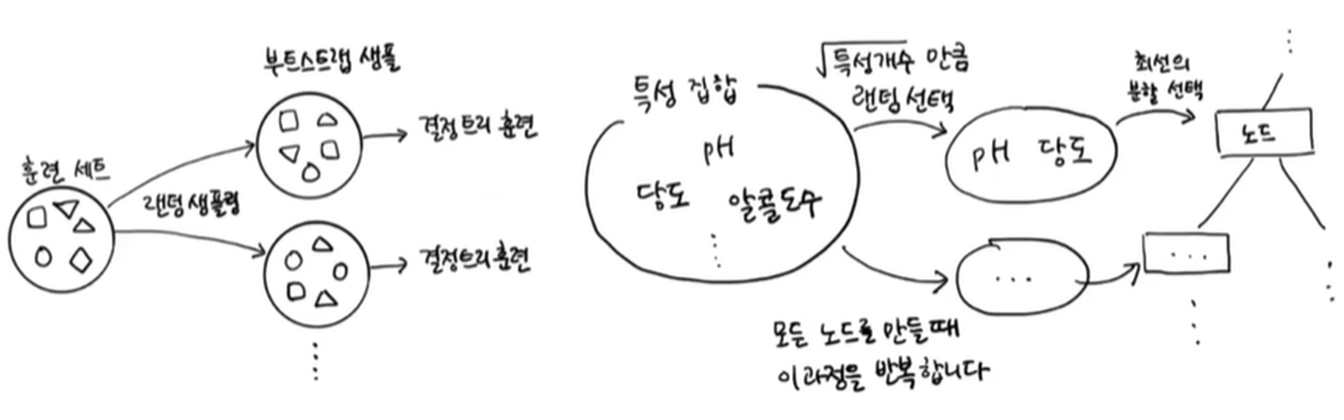

In [3]:
# 와인찾기 데이터
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [4]:
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [5]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
print(train_input.shape)
print(test_input.shape)

(5197, 3)
(1300, 3)


In [6]:
from sklearn.model_selection import cross_validate    # 크로스 검증용
from sklearn.ensemble import RandomForestClassifier    # 100개의 결정트리 사용

rf = RandomForestClassifier(n_jobs = -1, random_state = 42)    # n_jobs = -1 : 모든 cpu 사용
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
# return_train_score = True : 검증 점수와 훈련세트에 대한 점수도 리턴

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 결과 : 훈련세트 평균(99.74%) > 테스트세트 평균(89.05%)이나, 훈련세트 평균값이 과대하게 높아 과대적합임

0.9973541965122431 0.8905151032797809


In [7]:
# 랜덤 포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함
# 결정트리의 큰 장점중 하나이 특성중요도를 계산함
# 랜덤 포레스트의 특성중요도는 각 결정트리의 특성중요도를 취합한 것
# 훈련 후 중요도를 출력

rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [8]:
# [0.23167441 0.50039841 0.26792718] -> RandomForest 적용 결과
# [0.12345626 0.86862934 0.0079144] -> LogisticsRegression 적용 결과
# 알콜도수, 당도, pH를 비교해보면 당도의 중요도가 감소하며, 알콜 도수와 pH중요도가 상승함
# 이유 : 랜덤포레스트가 특성 일부를 랜덤하게 선택하여 결정트리를 훈련함(중복허용)
# 하나의 특성에 과도하게 집중하지 않고, 여러 특성이 폭넓게 훈련에 기여할 기회가 됨(과대적합을 줄임)

# RandomForestClassifier 기증 중에 자체적으로 모델을 평가하는 점수를 얻을 수 있음
# OOB(Out Of Bag) 부트스트랩에 포함되지 않고 남은 샘플 -> 결정 트리 평가용(검증세트로 활용)
# oob_score = True ; 랜덤포레스트는 각 결정트리의 oob 점수를 평균하여 출력
rf = RandomForestClassifier(oob_score =True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)    # 교차검증 점수와 비슷한 결과를 얻음 -> oob점수를 사용하면 교차검증을 대신할 수 있어 결과적으로 훈련세트에 더 많은 샘플을 사용할 수 있음

0.8934000384837406


In [9]:
# 엑스트라트리 : 100개의 결정트리 훈련 -> 부트스트랩 샘플을 사용하지 않고 전체 훈련세트 사용함
# 대신 노드 분할 시 가장 좋은 분할을 찾는것이 아니라 무작위로 분할함
# 엑스트라트리의 결정트리 splitter = 'random'
# 하나의 결정트리에서 특성을 무작위로 분할한다면 성능이 낮아지지만,
# 많은 트리를 앙상블하기 때문에 과대적합을 막고 검증세트의 점수를 높이는 효과가 있음

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # RandomForestClassifier와 결과가 비슷하나 속도가 더 빠름

0.9974503966084433 0.8887848893166506


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [11]:
# [0.20183568 0.52242907 0.27573525] -> ExtraTree 적용 결과
# [0.23167441 0.50039841 0.26792718] -> RandomForest 적용 결과
# [0.12345626 0.86862934 0.0079144] -> LogisticsRegression 적용 결과
# 특성 중요도를 보면 결정트리보다 당도에 대한 의존성이 낮음

In [12]:
# 그레디언트 부스팅(Gradient Boosting) : 기울기 / 깊이가 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블
# sklearn의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정트리 100개 사용
# 때문에 과대적합에 강하며, 높은 일반화 성능을 기대함

In [13]:
# Gradient는 경사 하강법을 사용하여 트리를 앙상블에 추가함
# 분류 : 로지스틱 손실함수, 회귀에서는 평균 제곱 오차 함수를 사용
# 경사 하강법 손실함수를 산으로 정의하고, 가장 낮은 곳으로 찾아 내려오는 과정

# 가장 낮은곳으로 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는것
# 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 훈련세트(88.81%) > 테스트세트(87.20%)로 과대적합이 아님

0.8881086892152563 0.8720430147331015


In [14]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, random_state = 42)
# n_estimators = 500 : 결정트리개수를 500개로 늘림(default : 100)
# learning_rage = 0.2 : 학습률(default : 0.1)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 결과 : 훈련세트(94.65%) > 테스트세트(87.80%)로 양측 차이값이 10미만이므로 과대적합이 아님

0.9464595437171814 0.8780082549788999


In [15]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)    # 당도 의존성이 낮음
# GradientBoosting이 RandomForest보다 조금 더 높은 성능을 갖고있으나, 순서대로 트리를 추가하기 때문에 훈련속도가 상대적으로 느림
# GradientBoostingClassifier는 구형모델이라 n_jobs와 같은 매개값이 없음

[0.15887763 0.6799705  0.16115187]


In [16]:
# [0.15887763 0.6799705  0.16115187] -> GradientBoosting 적용 결과
# [0.20183568 0.52242907 0.27573525] -> ExtraTree 적용 결과
# [0.23167441 0.50039841 0.26792718] -> RandomForest 적용 결과
# [0.12345626 0.86862934 0.0079144] -> LogisticsRegression 적용 결과

In [17]:
# 히스토그램 기반 GradientBoosting(Histogram Gradient) : 그래디언트 부스팅의 개선버전
# 입력 특성을 256 구간으로 나눔 -> 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있음
# 특히 256 구간 중에서 하나를 떼어놓고 누락된 값을 위해서 사용함
# HistoGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있음
# HistoGradientBoostingClassifier에는 트리의 개수를 지정하는데 n_estimators 대신 max_iter를 사용함(성능향상용)

from sklearn.ensemble import HistGradientBoostingClassifier    # 분류용...
# from sklearn.experimental import enable_hist_gradient_boosting 아직 개발중...
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 결과 : 훈련세트(93.22%) > 테스트세트(88.01%)로 양측 차이값이 10미만이므로 과대적합 억제 성공

0.9321723946453317 0.8801241948619236


In [18]:
from sklearn.inspection import permutation_importance
# permutation_importance : 특성 중요도 확인 / 특성을 하나씩 랜덤하게 섞어 모델의 성능이 변화되는지 관찰

# 히스토그램기반의 훈련 진행 -> 훈련세트에서 특성 중요도 계산
hgb.fit(train_input, train_target)

# n_repeats = 10 : 랜덤하게 섞을 수 있는 횟수(default : 5)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1)

print(result.importances_mean)    # 훈련세트에서의 특성 중요도
# [0.08876275 0.23438522 0.08027708] -> Histogram 적용 결과 / 훈련세트
# [0.15887763 0.6799705  0.16115187] -> GradientBoosting 적용 결과
# [0.20183568 0.52242907 0.27573525] -> ExtraTree 적용 결과
# [0.23167441 0.50039841 0.26792718] -> RandomForest 적용 결과
# [0.12345626 0.86862934 0.0079144] -> LogisticsRegression 적용 결과

[0.08876275 0.23438522 0.08027708]


In [19]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1)

print(result.importances_mean)    # 테스트세트에서의 특성 중요도
# [0.05969231 0.20238462 0.049     ] -> Histogram 적용 결과 / 테스트세트
# [0.08876275 0.23438522 0.08027708] -> Histogram 적용 결과 / 훈련세트
# [0.15887763 0.6799705  0.16115187] -> GradientBoosting 적용 결과
# [0.20183568 0.52242907 0.27573525] -> ExtraTree 적용 결과
# [0.23167441 0.50039841 0.26792718] -> RandomForest 적용 결과
# [0.12345626 0.86862934 0.0079144] -> LogisticsRegression 적용 결과

[0.05969231 0.20238462 0.049     ]


In [21]:
# HistGradientBoostingRegressor 히스토그램 기반 그레디언트 부스팅의 회귀버전
# sklearn 말고도 그레이덩트 부스팅 알고리즘을 구현한 라이브러리가 다수 존재 -> XGBoost 대표적 -> cross_validate() 이용 교차검증 가능
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
# tree_method = 'hist' : 히스토그램 기반 그레이디언트 부스팅
scores = cross_validate(xgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [22]:
# LGBMClassifier : ms에서 만든 LightGBM^2
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
